# Data Wrangling on 🛣️ SDOT - Vechicle Collision

In [ ]:
# Download essential packages
!pip install -q gdown pandas matplotlib seaborn

## 1. 📥 Downloading the Dataset

The **SDOT Collisions** dataset, uploaded to Google Drive for easy access. You can learn more about it [here](https://data.seattle.gov/dataset/SDOT-Collisions-All-Years/fqbw-79d9/about_data).

In [1]:
!gdown https://drive.google.com/uc?id=1wgB1crfC9HdLiFXse6a0JmoYsG4IKc4w

Downloading...
From (original): https://drive.google.com/uc?id=1wgB1crfC9HdLiFXse6a0JmoYsG4IKc4w
From (redirected): https://drive.google.com/uc?id=1wgB1crfC9HdLiFXse6a0JmoYsG4IKc4w&confirm=t&uuid=4f4bdcb7-f7d5-4de6-9646-ae8f8dc76d93
To: /content/SDOT_Collisions_All_Years.csv
100% 161M/161M [00:03<00:00, 41.2MB/s]


## 2. 📚 Importing Libraries

To begin our analysis and visualization, we’ll import the essential Python libraries.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. 📂 Load & Preview the Data
Let’s load the dataset into a Pandas DataFrame and take a quick look to understand its structure and content.

In [ ]:
# Load data
df = pd.read_csv(
    "SDOT_Collisions_All_Years.csv",
    low_memory=False    # Prioritize type consistency over memory optimization while loading
)

# View first 5 rows in a dataframe
df.head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
0,6452334,System.Byte[],358378,359838,3881534,Matched,Block,NaN,E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E,NaN,...,N,22-348398,PTCR,Police Traffic Collision Report,BRUKTAH,1/25/2023 12:00:00 AM,STATE INTERFACE,5/3/2023 12:00:00 AM,1.275366e+06,236187.648934
1,6452335,System.Byte[],361545,363025,ED30834,Matched,Intersection,29212.0,ARBORETUM DR E AND LAKE WASHINGTON BLVD E,NaN,...,N,2023-1318,PTCR,Police Traffic Collision Report,BRUKTAH,5/15/2023 12:00:00 AM,STATE INTERFACE,5/15/2023 12:00:00 AM,1.280244e+06,232549.364834
2,6452336,System.Byte[],369302,370782,EE40522,Unmatched,Block,NaN,S SPOKANE NR ST BETWEEN EAST MARGINAL ER WAY S...,NaN,...,Y,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,2/5/2024 12:00:00 AM,NaN,NaN,1.268983e+06,212176.594893
3,6452337,System.Byte[],364691,366171,ED89238,Unmatched,Intersection,37367.0,AURORA AVE N AND N 85TH ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,ABAYNEH,8/25/2023 12:00:00 AM,ABAYNEH,8/25/2023 12:00:00 AM,1.268255e+06,255550.050490
4,6452338,System.Byte[],369626,371106,ED99265,Matched,Block,NaN,S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...,NaN,...,N,2023-262431,PTCR,Police Traffic Collision Report,ZUNIGAR1,2/15/2024 12:00:00 AM,STATE INTERFACE,2/15/2024 12:00:00 AM,1.270689e+06,202435.972355


In [ ]:
# View last 5 rows in a dataframe
df.tail(5)

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
248320,6700654,System.Byte[],370715,372195,3837796,Unmatched,Block,NaN,S WILLOW ST BETWEEN CARLETON AVE S AND FLORA A...,NaN,...,Y,NaN,PTCR,Police Traffic Collision Report,JOHNSOS1,3/25/2024 12:00:00 AM,JOHNSOS1,3/25/2024 12:00:00 AM,1.272853e+06,200949.760514
248321,6700655,System.Byte[],370464,371944,EE55190,Unmatched,Intersection,32999.0,30TH AVE SW AND SW JUNEAU ST,NaN,...,Y,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,3/15/2024 12:00:00 AM,NaN,NaN,1.260721e+06,204457.304453
248322,6700656,System.Byte[],370048,371528,3913809,Unmatched,Intersection,30540.0,SEATTLE BLVD S AND S DEARBORN ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,3/4/2024 12:00:00 AM,JOHNSOS1,3/4/2024 12:00:00 AM,1.271606e+06,220992.684182
248323,6700657,System.Byte[],370825,372305,EE59843,Unmatched,Block,NaN,GREENWOOD AVE N BETWEEN N 36TH ST AND N 39TH ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,3/28/2024 12:00:00 AM,NaN,NaN,1.265286e+06,242018.516012
248324,6700658,System.Byte[],370129,371609,EE40086,Matched,Intersection,30771.0,23RD AVE S AND S LANE ST,NaN,...,N,2023-264584,PTCR,Police Traffic Collision Report,ZUNIGAR1,3/6/2024 12:00:00 AM,STATE INTERFACE,3/6/2024 12:00:00 AM,1.278015e+06,221035.307670


In [ ]:
# View columns and check the shape of dataframe
df.columns, df.shape

(Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
        'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
        'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
        'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
        'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
        'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
        'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
        'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
        'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
        'Source of the collision report', 'Source description', 'Added by User',
        'Added date', 'Modified by', 'Modified date', 'x', 'y'],
       dtype='object'),
 (248325, 50))

In [ ]:
# View info(index dtype and columns, non-null values & memory usage) of loaded dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248325 entries, 0 to 248324
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OBJECTID                        248325 non-null  int64  
 1   SE_ANNO_CAD_DATA                248325 non-null  object 
 2   INCKEY                          248325 non-null  int64  
 3   COLDETKEY                       248325 non-null  int64  
 4   REPORTNO                        248325 non-null  object 
 5   STATUS                          248325 non-null  object 
 6   ADDRTYPE                        244389 non-null  object 
 7   INTKEY                          82833 non-null   float64
 8   LOCATION                        243451 non-null  object 
 9   EXCEPTRSNCODE                   12795 non-null   object 
 10  EXCEPTRSNDESC                   12795 non-null   object 
 11  SEVERITYCODE                    248324 non-null  object 
 12  SEVERITYDESC    

## [About SOTD Data](https://www.seattle.gov/documents/Departments/SDOT/GIS/Collisions_OD.pdf)

| Attribute         | Description                                                 |
|-------------------|-------------------------------------------------------------|
| OBJECTID          | ESRI unique identifier                                      |
| INCKEY            | A unique key for the incident                               |
| COLDETKEY         | Secondary key for the incident                               |
| ADDRTYPE          | Collision address type: __Alley__, __Block__, __Intersection__          |
| INTKEY            | Key that corresponds to the intersection associated with a collision |
| LOCATION          | Description of the general location of the collision         |
| EXCEPTRSNCODE     |                                                           |
| EXCEPTRSNDESC     |                                                           |
| SEVERITYCODE      | A code that corresponds to the severity of the collision: __`3`—fatality__, __`2b`—serious injury__, __`2`—injury__, __`1`—prop damage__, __`0`—unknown__ |
| SEVERITYDESC      | A detailed description of the severity of the collision     |
| COLLISIONTYPE     | Collision type                                              |
| PERSONCOUNT       | The total number of people involved in the collision        |
| PEDCOUNT          | The number of pedestrians involved in the collision         |
| PEDCYLCOUNT       | The number of bicycles involved in the collision            |
| VEHCOUNT          | The number of vehicles involved in the collision            |
| INJURIES          | The number of total injuries in the collision               |
| SERIOUSINJURIES  | The number of serious injuries in the collision             |
| FATALITIES        | The number of fatalities in the collision                   |
| INCDATE           | The date of the incident                                    |
| INCDTTM           | The date and time of the incident                           |
| JUNCTIONTYPE      | Category of junction at which collision took place          |
| SDOT_COLCODE      | A code given to the collision by SDOT                       |
| SDOT_COLDESC      | A description of the collision corresponding to the collision code |
| INATTENTIONIND    | Whether or not collision was due to inattention (Y/N)       |
| UNDERINFL         | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER           | A description of the weather conditions during the time of the collision |
| ROADCOND          | The condition of the road during the collision              |
| LIGHTCOND         | The light conditions during the collision                   |
| PEDROWNOTGRNT    | Whether or not the pedestrian right of way was not granted (Y/N) |
| SDOTCOLNUM        | A number given to the collision by SDOT                     |
| SPEEDING          | Whether or not speeding was a factor in the collision (Y/N) |
| ST_COLCODE        | A code provided by the state that describes the collision.   |
| ST_COLDESC        | A description that corresponds to the state’s coding designation |
| SEGLANEKEY        | A key for the lane segment in which the collision occurred  |
| CROSSWALKKEY      | A key for the crosswalk at which the collision occurred     |
| HITPARKEDCAR      | Whether or not the collision involved hitting a parked car (Y/N) |


## 4. Data Wrangling

**Data wrangling** (or data cleaning) involves transforming raw data into a structured and usable format. This step includes filtering, selecting, and reshaping data to prepare it for analysis and visualization.

In this section, we will explore techniques like filtering rows based on conditions, selecting relevant columns, and slicing the dataset efficiently.

In [ ]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

Looks like there are no duplicated values present in the data. Let's move on to the next step that is checking for missing values.

In [ ]:
# Check missing values
df.isnull().sum()

OBJECTID                               0
SE_ANNO_CAD_DATA                       0
INCKEY                                 0
COLDETKEY                              0
REPORTNO                               0
STATUS                                 0
ADDRTYPE                            3936
INTKEY                            165492
LOCATION                            4874
EXCEPTRSNCODE                     235530
EXCEPTRSNDESC                     235530
SEVERITYCODE                           1
SEVERITYDESC                           0
COLLISIONTYPE                      33685
PERSONCOUNT                            0
PEDCOUNT                               0
PEDCYLCOUNT                            0
VEHCOUNT                               0
INJURIES                               0
SERIOUSINJURIES                        0
FATALITIES                             0
INCDATE                                0
INCDTTM                                0
JUNCTIONTYPE                       13005
SDOT_COLCODE    

There are lots of missing values ❌, but just looking at the numeric representation can be a bit difficult when there are many columns to check. So, let’s visualize the missing values using `matplotlib` and `seaborn` heatmaps to get a clear and quick overview!


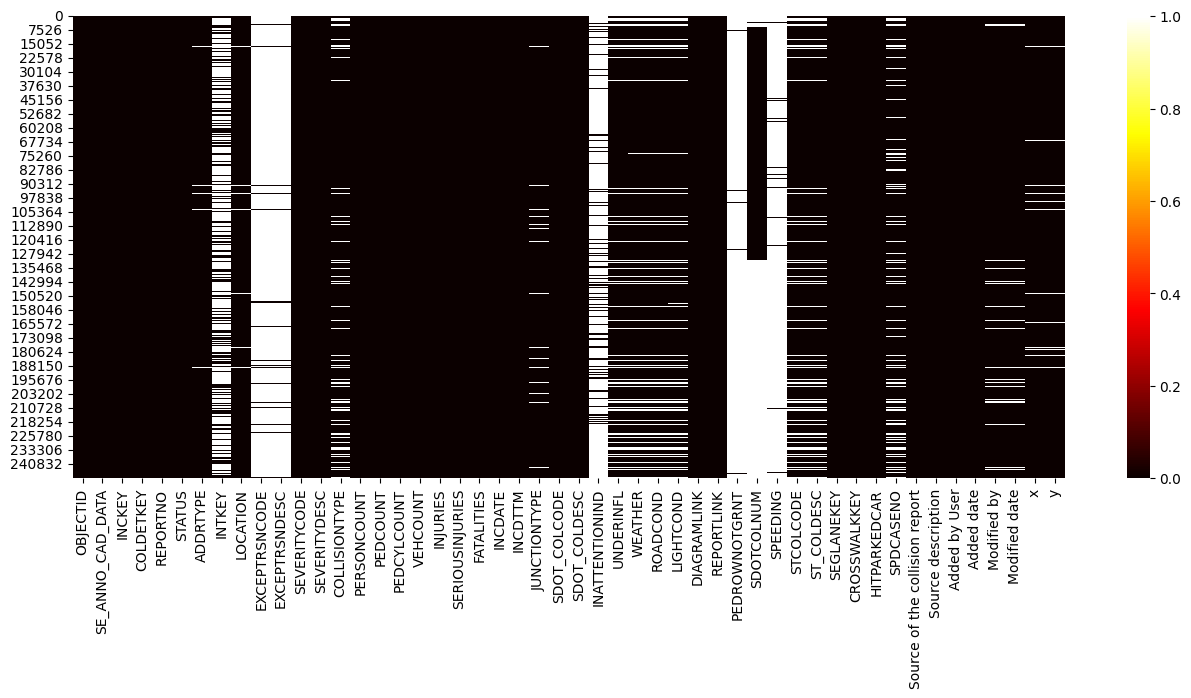

In [ ]:
# Visualize missing values using heatmaps
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap='hot')
plt.show();

Given that the dataset contains a significant number of missing values ⚠️, it is reasonable to assume that data from columns with more than **30%** missing values can be safely removed 🗑️.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Define threshold and filter columns that exceed threshold except SPEEDING column then remove it
threshold = 30
columns_to_remove = missing_percentage[(missing_percentage > threshold) & (missing_percentage.index != 'SPEEDING')].index.tolist()
df = df.drop(columns=columns_to_remove)

print(f"Removed {len(columns_to_remove)} columns after removal:\n{columns_to_remove}")
print(f"\nRemaining {len(df.columns)} columns after removal:\n{df.columns}")

Removed 6 columns after removal:
['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM']

Remaining 44 columns after removal:
Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK', 'SPEEDING',
       'STCOLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR',
       'SPDCASENO', 'Source of the collision report', 'Source description',
       'Added by User', 'Added date', 'Modified by', 'Modified date', 'x',
       'y'],
      dtype='object')


Let's check missing values again

In [ ]:
df.isnull().sum()

OBJECTID                               0
SE_ANNO_CAD_DATA                       0
INCKEY                                 0
COLDETKEY                              0
REPORTNO                               0
STATUS                                 0
ADDRTYPE                            3936
LOCATION                            4874
SEVERITYCODE                           1
SEVERITYDESC                           0
COLLISIONTYPE                      33685
PERSONCOUNT                            0
PEDCOUNT                               0
PEDCYLCOUNT                            0
VEHCOUNT                               0
INJURIES                               0
SERIOUSINJURIES                        0
FATALITIES                             0
INCDATE                                0
INCDTTM                                0
JUNCTIONTYPE                       13005
SDOT_COLCODE                           1
SDOT_COLDESC                           1
UNDERINFL                          33667
WEATHER         

Let's remove the columns that we don't need.

In [ ]:
columns_to_remove = ["INCKEY",            # Unique Key for the incident
                     "SE_ANNO_CAD_DATA",  # Contains every values as `System.Byte[]`
                     "REPORTNO",          # Irrelevant
                     "COLDETKEY",
                     "SEVERITYDESC",
                     "SDOT_COLDESC",
                     "ST_COLDESC",
                     "STATUS",
                     "REPORTLINK",
                     "SPDCASENO",
                     "SDOT_COLCODE",
                     "SEGLANEKEY",
                     "CROSSWALKKEY",
                     "STCOLCODE",
                     "HITPARKEDCAR",
                     "Source of the collision report",
                     "Source description",
                     "DIAGRAMLINK",
                     "Added by User",
                     "Modified by",
                     "Added date",
                     "Modified date"]

df = df.drop(columns=columns_to_remove)
print(f"Remaining {len(df.columns)} columns after removal:\n{df.columns}")

Remaining 22 columns after removal:
Index(['OBJECTID', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'x', 'y'],
      dtype='object')


## 4. Data Query Operation

### 4.1 Select specific columns to view

In [ ]:
df[['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE',
    'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
    'INJURIES',	'SERIOUSINJURIES', 'FATALITIES']]

,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
0,Block,E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E,1,Other,1,0,0,1,0,0,0
1,Intersection,ARBORETUM DR E AND LAKE WASHINGTON BLVD E,1,Rear Ended,2,0,0,2,0,0,0
2,Block,S SPOKANE NR ST BETWEEN EAST MARGINAL ER WAY S...,0,NaN,0,0,0,0,0,0,0
3,Intersection,AURORA AVE N AND N 85TH ST,1,NaN,1,0,0,0,0,0,0
4,Block,S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...,1,Sideswipe,3,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
248320,Block,S WILLOW ST BETWEEN CARLETON AVE S AND FLORA A...,1,NaN,1,0,0,0,0,0,0
248321,Intersection,30TH AVE SW AND SW JUNEAU ST,0,NaN,0,0,0,0,0,0,0
248322,Intersection,SEATTLE BLVD S AND S DEARBORN ST,1,NaN,1,0,0,0,0,0,0
248323,Block,GREENWOOD AVE N BETWEEN N 36TH ST AND N 39TH ST,0,NaN,0,0,0,0,0,0,0


### 4.2 View a specific row (Posiltion-Based with `.iloc`)

In [ ]:
# View 6th row
df.iloc[6]

OBJECTID                                          6452340
ADDRTYPE                                     Intersection
LOCATION                       34TH AVE NE AND NE 75TH ST
SEVERITYCODE                                            1
COLLISIONTYPE                                   Sideswipe
PERSONCOUNT                                             3
PEDCOUNT                                                0
PEDCYLCOUNT                                             0
VEHCOUNT                                                2
INJURIES                                                0
SERIOUSINJURIES                                         0
FATALITIES                                              0
INCDATE                              8/8/2023 12:00:00 AM
INCDTTM                               8/8/2023 5:57:00 PM
JUNCTIONTYPE       At Intersection (intersection related)
UNDERINFL                                               N
WEATHER                                             Clear
ROADCOND      

### 4.3 View a Specific Range of Rows and Columns Using Positional Indexing

In [ ]:
# Select 25th to 30th row and 2nd to 13th column in pandas dataframe
df.iloc[24:30, 1:13]

,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE
24,Block,M L KING JR WR WAY S BETWEEN S ORCAS ST AND S ...,1,Rear Ended,2,0,0,2,0,0,0,8/24/2023 12:00:00 AM
25,Block,15TH AVE S BETWEEN S BENNETT ST AND S LUCILE ST,2,Sideswipe,2,0,0,2,2,0,0,1/23/2023 12:00:00 AM
26,Block,15TH AVE S BETWEEN S HANFORD ST AND S HINDS ST,1,Parked Car,2,0,0,2,0,0,0,8/2/2023 12:00:00 AM
27,Intersection,2ND AVE W AND W ROY ST,2,Pedestrian,3,1,0,1,1,0,0,8/10/2023 12:00:00 AM
28,Intersection,19TH AVE AND E UNION ST,2,Angles,2,0,0,2,1,0,0,1/30/2023 12:00:00 AM
29,Intersection,BLAINE ST AND WESTLAKE AVE N,0,NaN,0,0,0,0,0,0,0,1/8/2024 12:00:00 AM


### 4.4 View data Based on a Column Condition

In [ ]:
# Viewing "SEVERITYCODE" columnn with value counts
df["SEVERITYCODE"].value_counts()

SEVERITYCODE
1     153148
2      65978
0      24845
2b      3895
3        458
Name: count, dtype: int64

| Severity Code | Description         |
|---------------|---------------------|
| 3             | Fatality            |
| 2b            | Serious Injury      |
| 2             | Injury              |
| 1             | Property Damage     |
| 0             | Unknown             |

In [ ]:
# View rows and columns with `SeverityCode` having Fatality
df[df['SEVERITYCODE'] == '3']

,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,x,y
561,6452895,Intersection,M L KING JR ER WAY S AND S OTHELLO ST,3,NaN,2,0,0,0,0,...,1/23/2017 12:00:00 AM,1/23/2017,At Intersection (intersection related),NaN,NaN,NaN,NaN,NaN,1.282818e+06,199264.215680
671,6453005,Block,M L KING JR ER WAY S BETWEEN MERTON WAY S AND ...,3,NaN,5,0,0,0,0,...,1/14/2024 12:00:00 AM,1/14/2024,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,1.283217e+06,191270.396856
802,6453136,Block,DEXTER AVE N BETWEEN THOMAS ST AND HARRISON ST,3,Pedestrian,2,1,0,1,0,...,1/23/2023 12:00:00 AM,1/23/2023 8:07:00 PM,Mid-Block (not related to intersection),N,Clear,Dry,Dark - Street Lights On,NaN,1.268289e+06,230342.678304
852,6453186,Block,ELLIOTT AVE W BETWEEN 6TH AVE W AND W MERCER ST,3,NaN,3,0,0,0,0,...,1/11/2024 12:00:00 AM,1/11/2024,NaN,NaN,NaN,NaN,NaN,NaN,1.262700e+06,231428.590113
920,6453254,Block,AIRPORT WAY S BETWEEN 8TH AVE S AND S LUCILE ST,3,Other,1,0,0,1,0,...,8/24/2023 12:00:00 AM,8/24/2023 4:03:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Dark - Street Lights On,NaN,1.272994e+06,205478.786502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246840,6699174,Block,ERSKINE WAY SW BETWEEN CALIFORNIA AVE SW AND L...,3,Pedestrian,2,1,0,1,0,...,11/19/2022 12:00:00 AM,11/19/2022 9:56:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,NaN,1.256782e+06,207809.202825
246969,6699303,Block,AURORA AVE N BETWEEN GARFIELD ST AND HOWE ST,3,Pedestrian,2,1,0,1,0,...,11/21/2022 12:00:00 AM,11/21/2022 3:18:00 AM,Mid-Block (not related to intersection),N,Raining,NaN,Dark - Street Lights On,NaN,1.268114e+06,235184.849317
246983,6699317,Block,AURORA AVE N BETWEEN N PHINNEY WAY AND N 46 UP...,3,Pedestrian,6,1,0,2,0,...,11/6/2022 12:00:00 AM,11/6/2022 10:17:00 PM,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,NaN,1.267353e+06,244944.632943
248026,6700360,Block,15TH AVE NW BETWEEN NW 83RD ST AND NW 85TH ST,3,NaN,3,0,0,0,0,...,3/1/2024 12:00:00 AM,3/1/2024,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,1.260300e+06,255380.617786


### 4.5 Select Rows Based on a Condition and Choose Specific Columns (Label-Based with `.loc`)

In [ ]:
# Select all rows and columns
# ['LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
# 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',	'SERIOUSINJURIES', 'FATALITIES']
# which have Property Damage as `SeverityCode`

df.loc[df['SEVERITYCODE'] == '1',
   ['LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
    'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',	'SERIOUSINJURIES', 'FATALITIES']].sample(3)

,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
157187,AURORA AVE N BETWEEN N 89TH ST AND N 90TH ST,1,Right Turn,5,0,0,2,0,0,0
107490,22ND AVE S BETWEEN E YESLER WAY AND S MAIN ST,1,Parked Car,2,0,0,2,0,0,0
191914,4TH AVE S AND S HOLGATE ST,1,Sideswipe,2,0,0,2,0,0,0


### 4.6 Filter High-Risk Accidents Based on Multiple Conditions 🚨

Let's select accidents that meet all of the following criteria:

- At least 2 pedestrians were involved

- At least 1 vehicle was involved

- The accident resulted in 3 or more injuries or at least 1 fatality

In [ ]:
# First convert above columns values into int from string
columns = ['PEDCOUNT', 'VEHCOUNT', 'INJURIES', 'FATALITIES']
for column in columns:
  df[column] = df[column].astype(int)

# Filtering accidents based on above mentioned conditions
filtered_accidents = df.loc[(df['PEDCOUNT']>=2) & (df['VEHCOUNT']>0) & ((df['INJURIES']>2) | (df['FATALITIES']>=1)),
                            ['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE',
                             'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
                             'INJURIES', 'SERIOUSINJURIES', 'FATALITIES']]

filtered_accidents.sample(5)

,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
201941,Block,NE 47TH ST BETWEEN ROOSEVELT WAY NE AND 11TH A...,2b,Pedestrian,5,3,0,1,3,1,0
4843,Block,E BLAINE ST BETWEEN FAIRVIEW AVE E AND EASTLAK...,2,Parked Car,5,3,0,2,3,0,0
241685,Block,S COLUMBIAN EB WAY BETWEEN I5 SB COLLECTOR AND...,2b,Parked Car,6,2,0,3,5,1,0
145703,Intersection,UNIV HOSPITAL DR AND NE PACIFIC ST,2,Angles,4,2,0,2,3,0,0
102538,Block,AURORA AVE N BETWEEN N 73RD ST AND KEEN WAY N,2,Other,8,5,0,1,7,0,0


In [ ]:
filtered_accidents.shape

(55, 11)

### 4.7 Filter Accidents Between 2019 and 2024 📅🚗

Let's narrow down the dataset to only include accidents that occurred **from 2019 to 2024**, allowing us to focus on **recent trends and patterns** in collision data. We'll use the `INCDATE` column to make this happen!


In [ ]:
df["INCDATE"]

0         12/31/2022 12:00:00 AM
1           1/2/2023 12:00:00 AM
2          1/15/2024 12:00:00 AM
3          8/12/2023 12:00:00 AM
4          9/10/2023 12:00:00 AM
                   ...          
248320     3/17/2024 12:00:00 AM
248321     2/29/2024 12:00:00 AM
248322    11/18/2023 12:00:00 AM
248323     3/16/2024 12:00:00 AM
248324     9/12/2023 12:00:00 AM
Name: INCDATE, Length: 248325, dtype: object

Looks like we’ve got collision data that not only tells **what happened** but also **exactly *when*** it happened — right down to the **date and time!** 🕒🚗 So, let’s break this down into **month and year** components to uncover hidden patterns and trends across different time frames!  

In [ ]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')
print(df['INCDATE'].dtype)
df['INCDATE']

/tmp/ipykernel_3235/1398836667.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')


datetime64[ns]


0        2022-12-31
1        2023-01-02
2        2024-01-15
3        2023-08-12
4        2023-09-10
            ...    
248320   2024-03-17
248321   2024-02-29
248322   2023-11-18
248323   2024-03-16
248324   2023-09-12
Name: INCDATE, Length: 248325, dtype: datetime64[ns]

In [ ]:
df["MONTH"] = df["INCDATE"].dt.month
df["YEAR"] = df["INCDATE"].dt.year

df["MONTH"]

0         12
1          1
2          1
3          8
4          9
          ..
248320     3
248321     2
248322    11
248323     3
248324     9
Name: MONTH, Length: 248325, dtype: int32

Now that we’ve got the spliited dates of collisions, let’s take it a step further and categorize them based on **time of day** — from *Late Night* to *Evening*.  We'll use the `INCTIME` column to make this happen! 🌙🌅🌞 This helps us spot when most accidents happen and uncover risky hours on Seattle roads! 📉🔍

In order to analyse timewise, splitting the data into 6 categories wise:  
- Late Night
- Early Morning
- Morning
- Noon
- Eve
- Night

In [ ]:
# Convert 'INCDTTM' column to time format
df["INCTIME"] = pd.to_datetime(df["INCDTTM"], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.dropna(subset=['INCTIME'])    # Filter out invalid or missing time values

# Define bins and labels for time of day categorization
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']

# Categorize time of day using pd.cut
df = df.copy()
df.loc[:, "TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=bins, labels=labels, include_lowest=True)

df["TIMEOFDAY"]

0            Late Night
1               Morning
4                  Noon
5               Evening
6               Evening
              ...      
248310    Early Morning
248314          Evening
248316          Evening
248317          Evening
248324          Morning
Name: TIMEOFDAY, Length: 188523, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

In [ ]:
df_time = pd.DataFrame({'TIME' : ['00:00 to 04:00',
                                  '04:00 to 08:00',
                                  '08:00 to 12:00',
                                  '12:00 to 16:00',
                                  '16:00 to 20:00',
                                  '20:00 to 00:00']},index=['Late Night','Early Morning',
                                                            'Morning','Noon','Eve','Night'])
df_time

,TIME
Late Night,00:00 to 04:00
Early Morning,04:00 to 08:00
Morning,08:00 to 12:00
Noon,12:00 to 16:00
Eve,16:00 to 20:00
Night,20:00 to 00:00


Now we can drop `INCDATE` and `INCDTTM` columns.

In [ ]:
df.drop(["INCDATE","INCDTTM", "INCTIME"],axis=1,inplace=True)

Finally, lets filter the data from `2019` to `2024`

In [ ]:
df_2019_2024 = df[df["YEAR"].between(2019, 2024)].reset_index(drop=True)
df_2019_2024.shape

(31620, 23)

Let’s take a peek at the data

In [ ]:
df_2019_2024.isnull().sum()

OBJECTID               0
ADDRTYPE              60
LOCATION             148
SEVERITYCODE           0
COLLISIONTYPE          0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE         298
UNDERINFL              0
WEATHER              107
ROADCOND              31
LIGHTCOND             96
SPEEDING           29840
x                    255
y                    255
MONTH                  0
YEAR                   0
TIMEOFDAY              0
dtype: int64

### 4.8 View the `UNDERINFL` column

In [ ]:
df = df_2019_2024.copy()
df["UNDERINFL"].value_counts()

UNDERINFL
N    31060
Y      560
Name: count, dtype: int64

### 4.9 View the `SPEEDING` column

As we saw the heatmap, the `SPEEDING` column has many missing values. Let's see what is going on.

In [ ]:
df["SPEEDING"].unique()

array(['Y', nan], dtype=object)

Let's replace $nan$ missing values in `SPEEDING` column with `N`.

In [ ]:
df["SPEEDING"] = df["SPEEDING"].fillna("N")
df["SPEEDING"].value_counts()

SPEEDING
N    29840
Y     1780
Name: count, dtype: int64

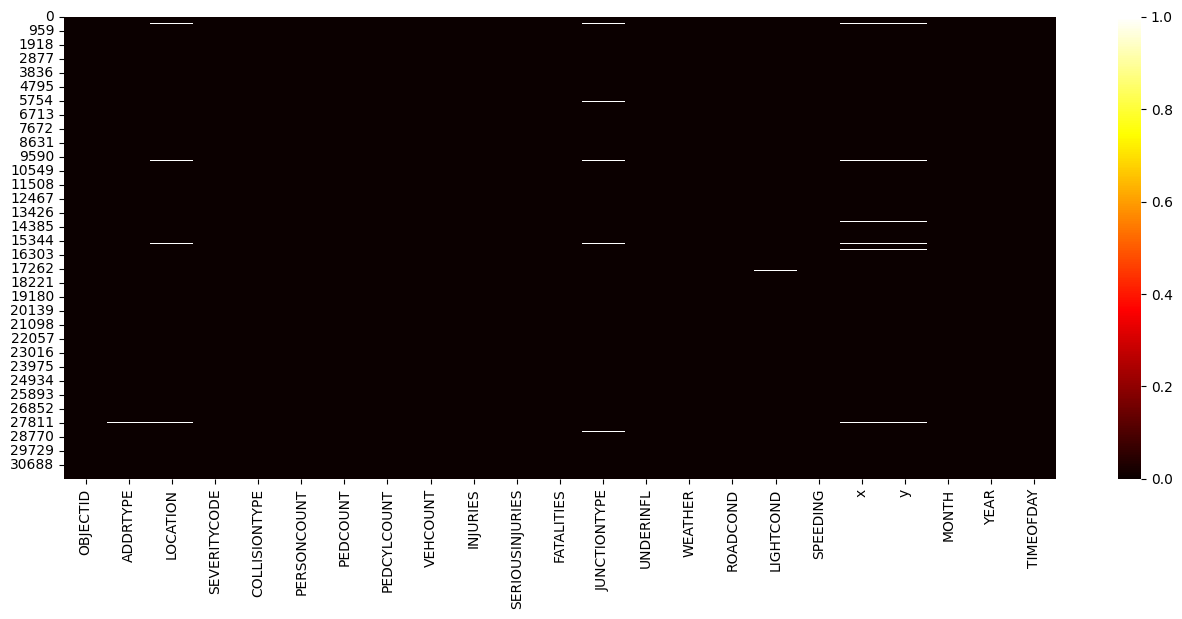

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap='hot')
plt.show();

## 5. 💾 Save the DataFrame to CSV

Now that we’ve cleaned, filtered, and enriched our dataset 🧹—it’s time to lock in our progress!
Saving the DataFrame ensures we won’t have to repeat all the wrangling steps and lets us jump straight into **Exploratory Data Analysis (EDA)** next.   

In [ ]:
file_name = "SDOT_Collisions_2019_24.csv"
df.to_csv(file_name, index=False)
print(f"Data cleaned and saved as {file_name}")

Data cleaned and saved as SDOT_Collisions_2019_24.csv
